### ASTR 3300/5300$-$003: Astrostatistics
***N. Pol***
___

# Homework 2
### Due: Friday, Feb 7, at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

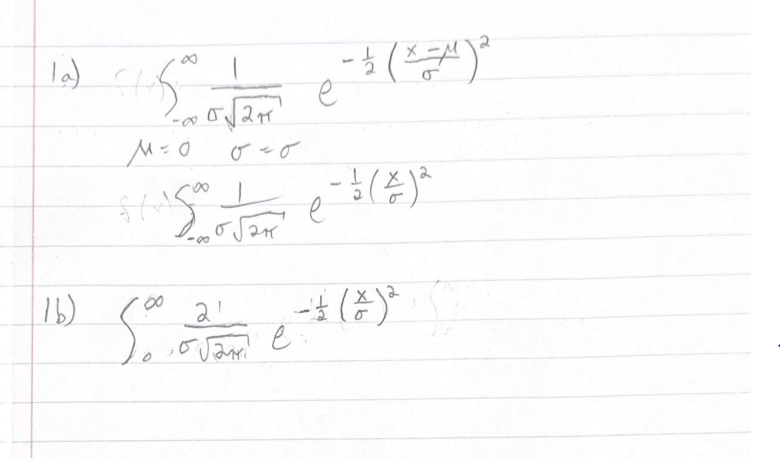

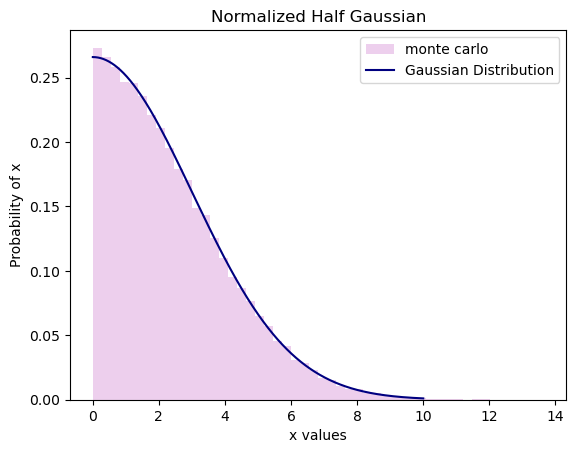

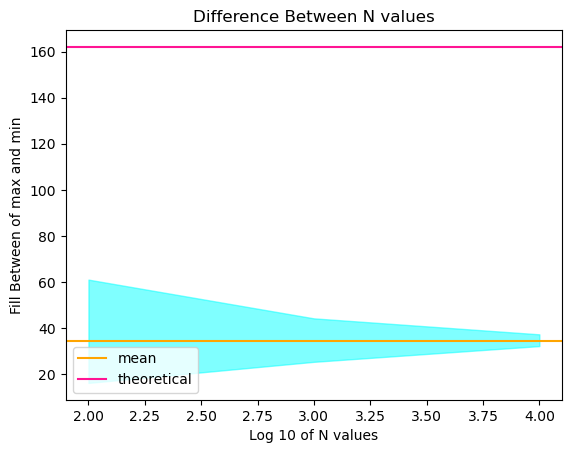

In [75]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


# This first section creates our sample data and half gaussian distribution
x = np.linspace(0,10,1000)
gauss = stats.norm(0,3)
gauss_draws = gauss.rvs(100000)
mask = gauss_draws > 0
half_gauss = gauss_draws[mask]

# This plot compares our sample data to the normalized pdf
plt.figure(1)
_=plt.hist(half_gauss, bins=50, color = 'plum', histtype='stepfilled', alpha=0.5, density=True,label = 'monte carlo');
plt.plot(x,2*gauss.pdf(x),color = 'navy', label = 'Gaussian Distribution')
plt.title('Normalized Half Gaussian')
plt.xlabel('x values')
plt.ylabel('Probability of x')
plt.legend()

# Here we are finding the mean, max, and min for each number of draws
N2 = np.array([100,1000,10000])
max_mc = []
min_mc = []
mean_mc = []
for i in range(0,3):
    N_loop = N2[i]
    gauss_test = []
    for j in range(0,100):
        gauss2 = np.random.normal(0,3,N_loop)
        mask2 = gauss2 > 0
        half_gauss2 = gauss2[mask2]
        gauss_test.append(np.mean(half_gauss2**3)*np.sqrt(2/np.pi))
    gauss_test = np.array(gauss_test)
    max_mc.append(np.max(gauss_test))
    min_mc.append(np.min(gauss_test))
    mean_mc.append(np.mean(gauss_test))
max_mc = np.array(max_mc)
min_mc = np.array(min_mc)
mean_mc = np.mean(np.array(mean_mc))

# This calculates the theoretical value
theo = 2*(3**4)
        
# This plots the log 10 of the N values vs the fill between of the max and min
plt.figure(2)        
plt.fill_between(np.log10(N2),max_mc,min_mc,color='cyan',alpha = 0.5)
# This plots the average monte carlo value
plt.axhline(mean_mc,color = 'orange',label = 'mean')
# This plots the theoretical value
plt.axhline(theo,color = 'deeppink',label = 'theoretical')
plt.title('Difference Between N values')
plt.xlabel('Log 10 of N values')
plt.ylabel('Fill Between of max and min')
plt.legend()

        

        
    


## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

These are our 10 draws from iq [ 82.93063274  85.91527103 112.23666352 110.50545923 115.42635847
 132.76612426 122.02938463 105.26006413 102.6167743  100.19173755]
This is the probability of someone having a iq of 145 0.0002954565607958672
The probability of a person having an iq greater than 145 is  0.0013498980316301035
The iq that is one in a million is 171.30136463234348


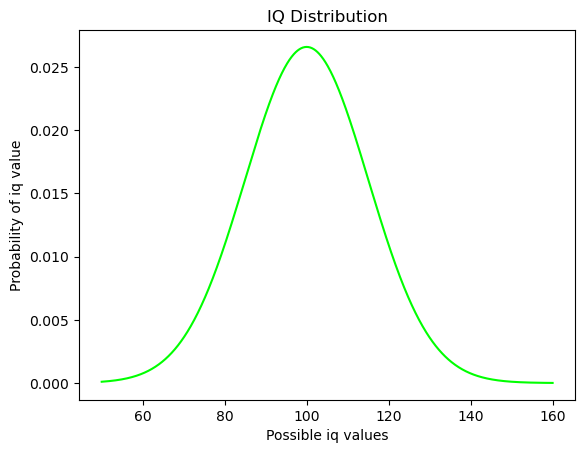

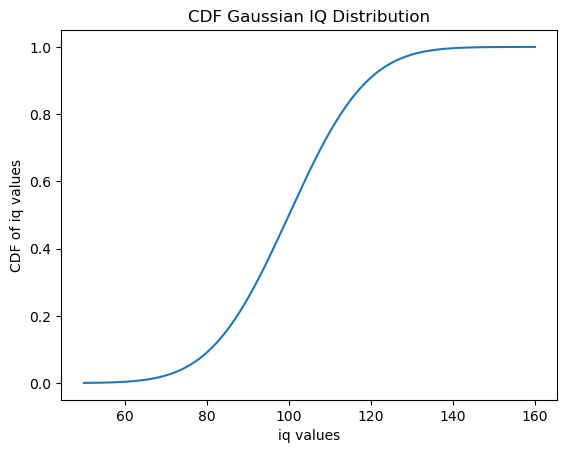

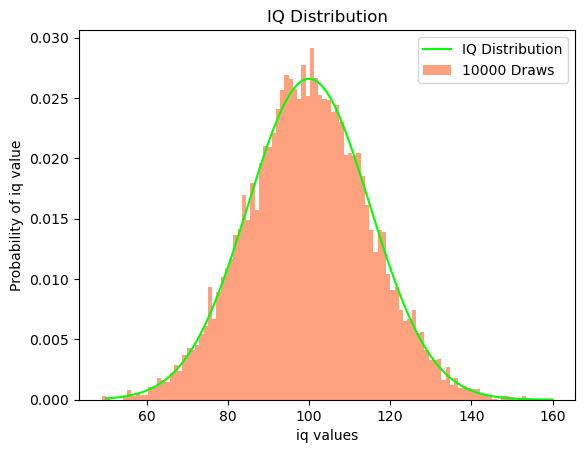

In [76]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# This creates our gaussian distribution for the iq values
# This also draws ten random values from that distribution
iq = stats.norm(100,15) # Normal distribution with mean = 100, stdev = 15
iq_draws = iq.rvs(10)
x = np.linspace(50,160,1000)

# Here we are plotting the probability density function of our iq values 
plt.figure(1)
plt.plot(x,iq.pdf(x),color = 'lime')
plt.title('IQ Distribution')
plt.xlabel('Possible iq values')
plt.ylabel('Probability of iq value')
print("These are our 10 draws from iq",iq_draws)
print("This is the probability of someone having a iq of 145",iq.pdf(145))

# Here we are plotting the cdf method of the distribution
plt.figure(2)
plt.plot(x,iq.cdf(x))
plt.title('CDF Gaussian IQ Distribution')
plt.xlabel('iq values')
plt.ylabel('CDF of iq values')


# We are creating so sample data by taking 10,000 draws of a uniform distribution
iq_uni = np.random.uniform(0, 1, 10000)
iq_10000 = iq.ppf(iq_uni)



# This plot is a comparision of our pdf and the sample data
plt.figure(3)
plt.plot(x,iq.pdf(x), color = 'lime',label = 'IQ Distribution')
_ = plt.hist(iq_10000, bins=100, histtype='stepfilled', alpha=0.5, density=True, color = 'orangered',label = '10000 Draws')
plt.title('IQ Distribution')
plt.xlabel('iq values')
plt.ylabel('Probability of iq value')
plt.legend()


# These lines find the probability of a person having and iq of 145
prob_145 = 1 - iq.cdf(145)
print('The probability of a person having an iq greater than 145 is ',prob_145)


# This finds the iq that is a one in a million chance
iq_mil = stats.norm.isf(.000001,100,15)
print('The iq that is one in a million is',iq_mil)
        
        








## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

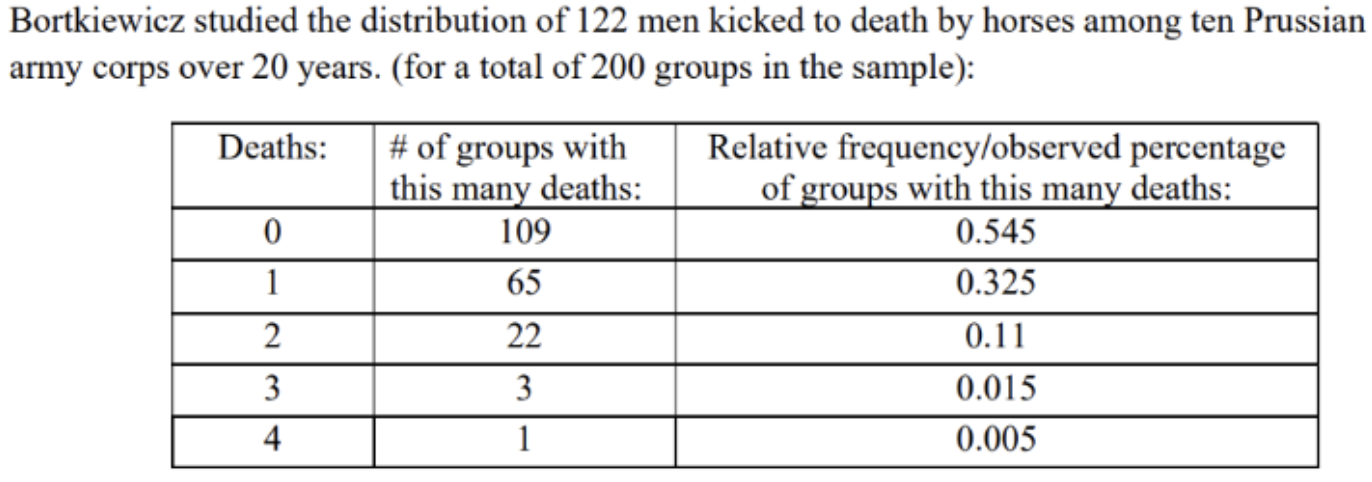

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

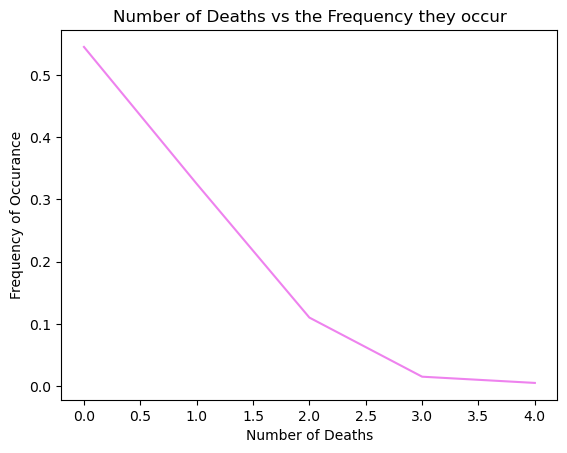

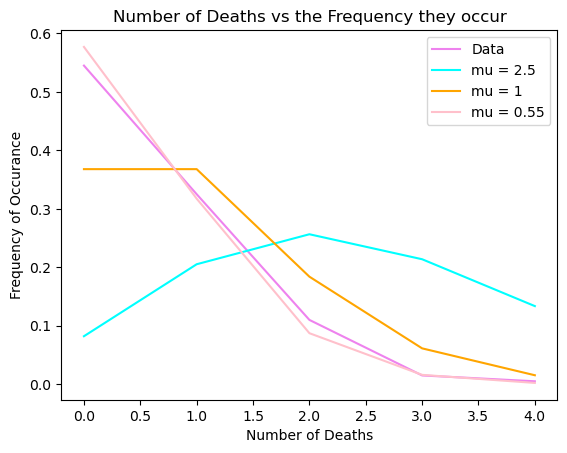

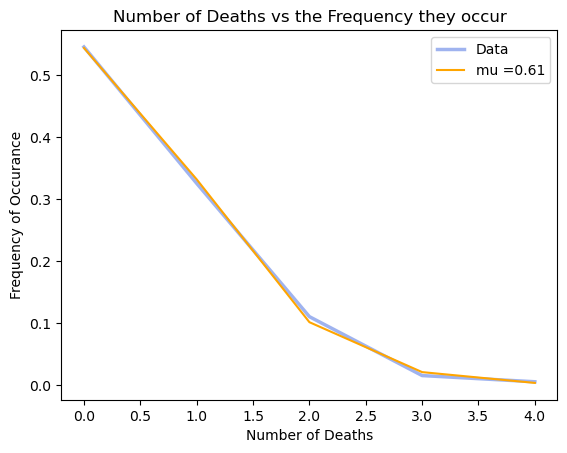

In [81]:
# These arrays are our first and third column from the table
deaths = np.array([0,1,2,3,4])
freq_death = np.array([0.545,0.325,0.11,0.015,0.005])

# This plots the first versus the third column
plt.figure(1)
plt.plot(deaths,freq_death, color = 'violet')
plt.title('Number of Deaths vs the Frequency they occur')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency of Occurance')


# Here we will be finding the pmf of our guessed mu's
x = np.arange(0,5)
guess1 = stats.poisson(2.5)
guess1_fun = guess1.pmf(x)
guess2 = stats.poisson(1)
guess2_fun = guess2.pmf(x)
guess3 = stats.poisson(0.55)
guess3_fun = guess3.pmf(x)

# This plot is ouur original plot overlayed with our guesses for mu
plt.figure(2)
plt.plot(deaths,freq_death, color = 'violet', label = 'Data')
plt.plot(x,guess1_fun, color = 'aqua', label = 'mu = 2.5')
plt.plot(x,guess2_fun, color = 'orange', label = 'mu = 1')
plt.plot(x,guess3_fun, color = 'pink', label = 'mu = 0.55')
plt.title('Number of Deaths vs the Frequency they occur')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency of Occurance')
plt.legend()

# This is where we calculate the weighted mu and find its pmf
mu_weigh = np.sum(deaths*freq_death)
mu_poisson = stats.poisson(mu_weigh)
mu_fun = mu_poisson.pmf(x)

#The is a plot of our original data overlayed with weighted mu
plt.figure(3)
plt.plot(deaths,freq_death, color = 'royalblue', label = 'Data', alpha = 0.5, linewidth = 2.5)
plt.plot(x,mu_fun, color = 'orange', label = 'mu ={:.2f}'.format(mu_weigh))
plt.title('Number of Deaths vs the Frequency they occur')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency of Occurance')
plt.legend()